In [1]:
'''
Problem Satatement:
This dataset contains informaion of users in social netwrok.
This social  netork has several buisenesss client which can pos ads on it.
One of the client has a car company which was just launched a luxury SUV for a rediculious [price.
Builld a bernoulli naivve bayes model using the following dataset and classify which of the user of the social netwoek are h=going to purchase 
this luxury SUV. I implies that was a purchase and 0 implies there wasn't a purchase.

@autthor: Virendra Ghule
1. Buusiseness problem
1.1 What is thee buiseness objective ?
    1.1.1 This will help you bring those audience to your website who are interested in cars.
          and theere will be many of these whoo are planning tu buy a car in the near future.
    1.1.2 Communicatin g with your target audiance over social media is always a great way to build a good market reputation.
        Try responding to peoplesautomi=obile related queries on twitter and face book
        pages quickly to be there first choice whehn it comes to buiyi ng a car.

1.2 Are there any constraints?
    not having a clear marketing or social media strategy may result in reduced benefits of your buiseness.
    Additionaly resources may be needed to manage your online presence.
    Social media is immediate and needs daily monitioring
    If you dont actively manage your social media presence,
    you may not see any real benefits.

    There is arisk of unwanted or inaaappropriate behaviour on your site
    including bullying and harssement

    Greater ex[possure online has the potential to attraacte risks.
    Risks can include negative feedback information, leaks and hacking.


'''

"\nProblem Satatement:\nThis dataset contains informaion of users in social netwrok.\nThis social  netork has several buisenesss client which can pos ads on it.\nOne of the client has a car company which was just launched a luxury SUV for a rediculious [price.\nBuilld a bernoulli naivve bayes model using the following dataset and classify which of the user of the social netwoek are h=going to purchase \nthis luxury SUV. I implies that was a purchase and 0 implies there wasn't a purchase.\n\n@autthor: Virendra Ghule\n1. Buusiseness problem\n1.1 What is thee buiseness objective ?\n    1.1.1 This will help you bring those audience to your website who are interested in cars.\n          and theere will be many of these whoo are planning tu buy a car in the near future.\n    1.1.2 Communicatin g with your target audiance over social media is always a great way to build a good market reputation.\n        Try responding to peoplesautomi=obile related queries on twitter and face book\n        p

In [2]:
#work on each feature of the datase to create a data dictionaryy as 
#User ID: integer type which is not contributory
#Gender: object type need to be label encoding
#Age : Integer
#EstimateddSalary:  Integer
#purchased: Intger type


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#LET US FIRST IMPORT THE DATAASET
car=pd.read_csv("NB_Car_Ad.csv")

In [6]:
car.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
#Exploratory Data analyisis
car.columns
car.dtypes
car.describe()

#min age of employee is 18 yrs
#ma age of employee is 60 yrs

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#average age is 37
#min salary is 15000
#max salary is 1,50,000
#average salary is 69742

In [9]:
car.isna().sum()
car.drop(["User ID"],axis=1,inplace=True)

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

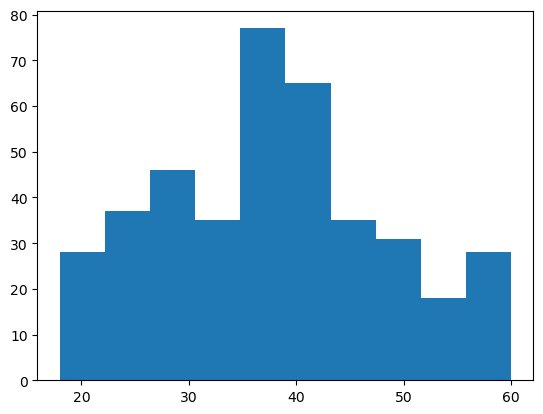

In [10]:
car.dtypes
plt.hist(car.Age)

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

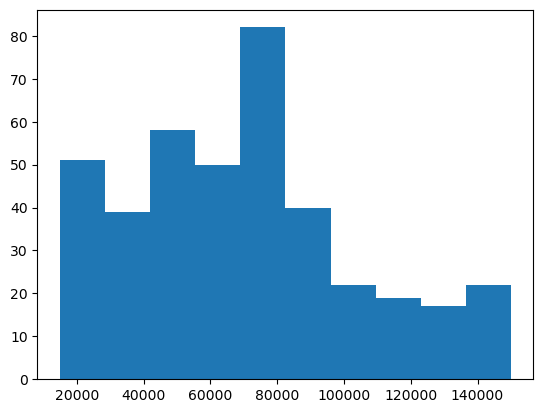

In [11]:
#age is   normally distributed

plt.hist(car.EstimatedSalary)

In [12]:
#Data is normally distributed but right skewed

In [13]:
#Data Pre-processing 
#1.1 Data cleaning, Feature Enginnering, etc.
car.dtypes

#The column gender is of object type
#Let us apply label encoder to input feature

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [14]:
#this is moodel of label_encoder which is applied to all the object types
car['Gender']=label_encoder.fit_transform(car['Gender'])

In [15]:
#now let us apply normalization function
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

car_norm=norm_funct(car)
car_norm.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,0.467976,0.405500,0.357500
std,0.500526,0.249592,0.252570,0.479864
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.279762,0.207407,0.000000
50%,0.000000,0.452381,0.407407,0.000000
75%,1.000000,0.666667,0.540741,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [16]:
#Now let us designate train data And Test data

from sklearn.model_selection import train_test_split
car_train,car_test=train_test_split(car_norm,test_size=0.2)

In [17]:
col_names1=list(car_train.columns)
train_X=car_train[col_names1[0:2]]
train_y=car_train[col_names1[3]]
col_names2=list(car_train.columns)
test_X=car_test[col_names2[0:2]]
test_y=car_test[col_names2[3]]

In [18]:
#model building
#build the model on the scaled data
#build a naive bayes model
#like MultinomialNB, this classifier is suitable for discrete data.
#Bernoulli Naive Bayes is designed for binary/boolean features
from sklearn.naive_bayes import BernoulliNB as BB
classifier_bb=BB()

classifier_bb.fit(train_X,train_y)
#Let us now evaluate on test data
test_pred_b=classifier_bb.predict(test_X)
#Accuracy of the predictions
accuracy_test_b=np.mean(test_pred_b==test_y)
accuracy_test_b

0.6375

In [ ]:
#let us now check confusion  matrix
from sklearn.metrics import accuracy_score
